# Chemically speaking, what types of wine are there? What predicts wine quality?

AXA data science challenge to apply for the position of graduate level Data Scientist.

For the following challenge, I will be confirming the Support Vector Machine (SVM) results to the reference paper below

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. <br> Modeling wine preferences by data mining from physicochemical properties.
   <br> In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236. <br> https://www.sciencedirect.com/science/article/pii/S0167923609001377


Then Using feature selection, finding out whether this improves the performance of the classification algorithm. 

SVM algorithm can classify a dataset as belonging to a specific grouping of data points. SVM is typically used for binary classification problems, but can be extended to multiclass classifications. 

Every feature vector is considered as a point in the high dimensional feature space, the algorithm should be able to identify the groups, and predict which group additional data points would belong to given their point in the feature space.

The general code of the algorithm is:
1. Identify each classification category.
2. Identify the points of each grouping that are closest to the other grouping.
3. Based on these closest points, create a decision boundary that will be used to classify additional data.
4. The Support Vector Classifier model will assign new data points based on which zone they fall into.



In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# scaling data 
from sklearn.preprocessing import StandardScaler

# Spliting data
from sklearn.model_selection import train_test_split

# SVM

# Model evaluation
import sklearn.metrics as metrics

In [2]:
# Importing Data
red_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

red = pd.read_csv(red_url, delimiter=';')
white = pd.read_csv(white_url, delimiter=';')

wine = [red,white]

for x in wine:
    display(x.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Number of observations
print('number of white wines:', len(white),
     '\nnumber of red wines:', len(red))

number of white wines: 4898 
number of red wines: 1599


As there is an imbalance of classes (wines), however as we are not classifing whether they are red or white, the data will be kept seperate, each wine having its own classification algorithm.

In [4]:
# Confirm non-missingness
print('rows containing missing values for \n white:', len(white[white.isnull().any(axis=1)]), 
      '\n red:', len(red[red.isnull().any(axis=1)]))

rows containing missing values for 
 white: 0 
 red: 0


As the schema states, there is no missing data

In [5]:
for x in wine:
    display(x.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
col_names = white.columns
col_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

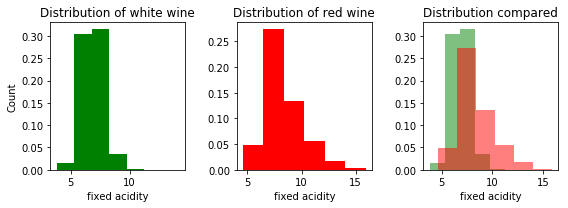

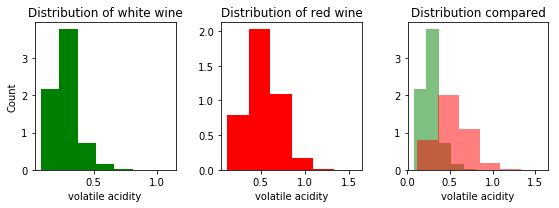

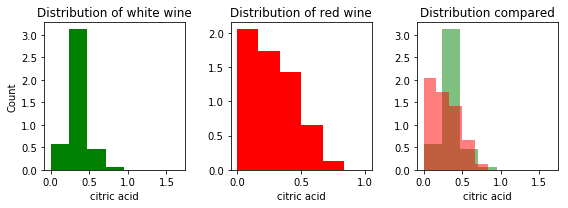

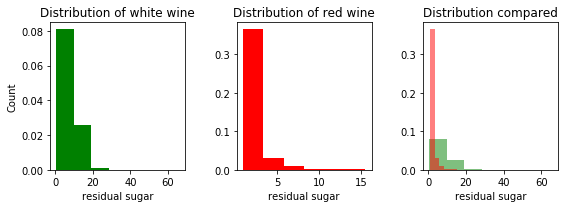

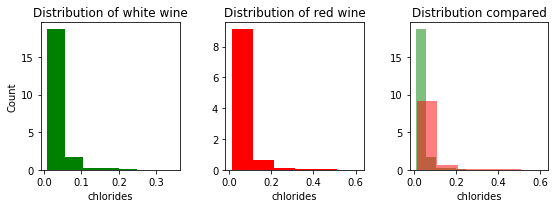

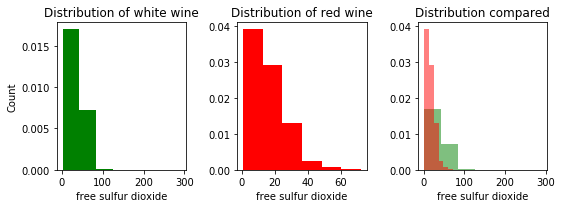

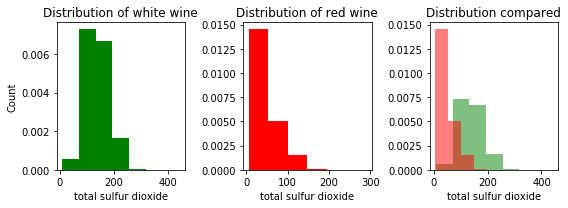

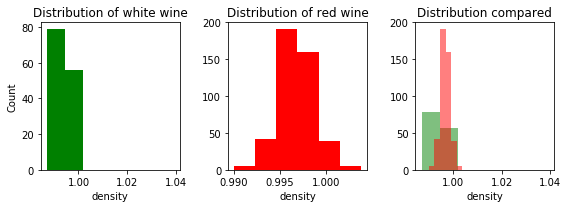

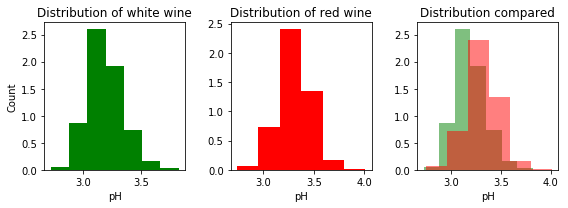

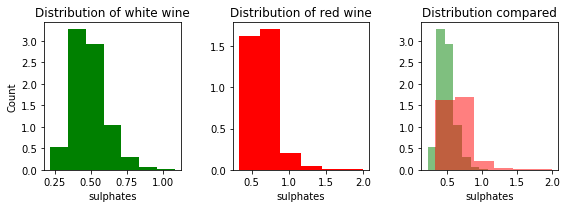

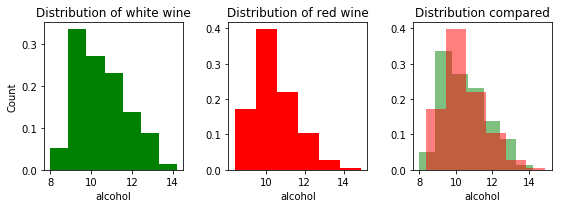

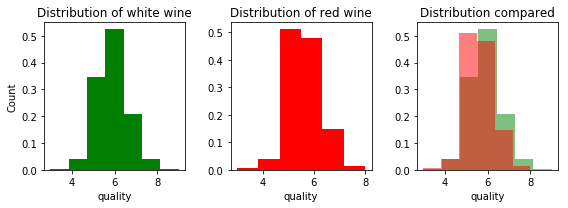

In [7]:
for x in col_names:
    
    plt.figure(figsize = (8,3))
    
    ax1 = plt.subplot(131, title = 'Distribution of white wine', xlabel = x, ylabel = 'Count')
    ax1.hist(white[x], bins = 7, color = 'green', density = True)
    
    ax2 = plt.subplot(132, title = 'Distribution of red wine', xlabel = x)
    ax2.hist(red[x], bins = 6, color = 'red', density = True)
    
    ax3 = plt.subplot(133, title = 'Distribution compared', xlabel = x)
    ax3.hist(white[x], bins = 7, color = 'green', density = True, alpha = 0.5)
    ax3.hist(red[x], bins = 6, color = 'red', density = True, alpha = 0.5)
    
    plt.tight_layout()
    plt.show()

Data for citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide and sulphates are very negatively skewed, these attributes will be transformed on the log scale, after adding 1 to the values, this is because log(0) is not defined and will produce NaN values in the data.

fixed acidity, volatile acidity, alcohol are slightly skewed, these will not be log transformed 

density is only very negatively skewed for white wine, will tranform this independently of red wine, similar to the process above.

pH and quality are not skewed (normal distribution)

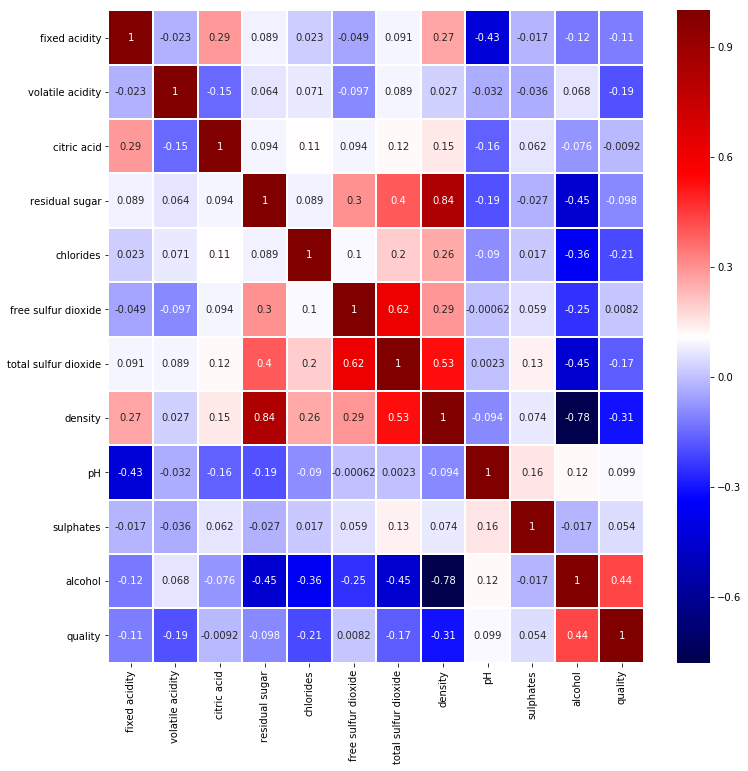

In [8]:
corr_white = white.corr()
plt.figure(figsize = (12,12))
ax = sns.heatmap(corr_white, cmap = 'seismic', linewidths = 1, annot = True)

In [9]:
# Log tranformation - transforming columns of very skewed data
log = ['citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

for x in wine:
    for y in log:
        x[y] = np.log(x[y] + 1) # As there are some 0 values log(0) is not defined

# density white wine
white['density'] = np.log(white['density'] + 1)

# Scaling data
scaler = StandardScaler()
# Scaling all columns except quality
for x in wine:
    
    names = white.columns.drop('quality')
    x[names] = scaler.fit_transform(x[names])
    
    display(x.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.497274,-0.568467,-0.251089,-0.247127,-0.116363,0.558274,1.288643,-0.601767,-0.960246,5
1,-0.298547,1.967442,-1.497274,0.232701,0.268164,0.992765,0.856963,0.028261,-0.719933,0.189123,-0.584777,5
2,-0.298547,1.297065,-1.239878,-0.089701,0.127588,0.214202,0.546021,0.134264,-0.331177,-0.003173,-0.584777,5
3,1.654856,-1.384443,1.421087,-0.568467,-0.274943,0.403079,0.697760,0.664277,-0.979104,-0.465815,-0.584777,6
4,-0.528360,0.961877,-1.497274,-0.568467,-0.251089,-0.247127,-0.116363,0.558274,1.288643,-0.601767,-0.960246,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.263421,1.832055,-0.026825,0.683221,0.767515,2.329873,-1.246921,-0.326216,-1.393152,6
1,-0.657501,0.215896,0.094259,-1.101414,0.165013,-1.465462,0.012069,-0.008411,0.740029,0.039274,-0.824276,6
2,1.475751,0.017452,0.594406,0.435071,0.212858,-0.073511,-0.905902,0.359577,0.475102,-0.419164,-0.336667,6
3,0.409125,-0.478657,-0.077446,0.690051,0.593986,0.764827,1.036385,0.526777,0.011480,-0.797524,-0.499203,6
4,0.409125,-0.478657,-0.077446,0.690051,0.593986,0.764827,1.036385,0.526777,0.011480,-0.797524,-0.499203,6


The data has been standardised to have mean 0 and standard deviation 1


#################################
Analysis for white wine
#################################

Dimensions 
Training sets: (3281, 11) 
Testing set: (1617, 11) 


**BEFORE feature selection** 
Average accuracy scores 
training set:  0.5486132276744895 
testing set:  0.5238095238095238 

Mean Absolute Error: 0.5380333951762524 


**AFTER feature selection** 
Average accuracy scores 
training set:  0.5400792441328863 
testing set:  0.5139146567717996 

Mean Absolute Error: 0.5485466914038343 

Significant features for  white wine: 
 ['volatile acidity', 'density', 'alcohol']


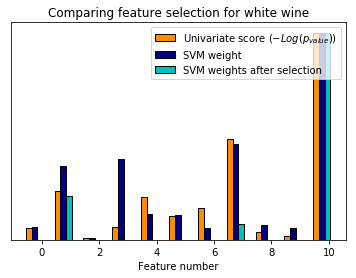


#################################
Analysis for red wine
#################################

Dimensions 
Training sets: (1071, 11) 
Testing set: (528, 11) 


**BEFORE feature selection** 
Average accuracy scores 
training set:  0.5910364145658263 
testing set:  0.6079545454545454 

Mean Absolute Error: 0.42613636363636365 


**AFTER feature selection** 
Average accuracy scores 
training set:  0.5527544351073763 
testing set:  0.5833333333333334 

Mean Absolute Error: 0.44886363636363635 

Significant features for  red wine: 
 ['volatile acidity', 'sulphates', 'alcohol']


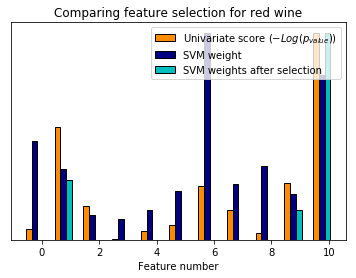

In [14]:
# Spliting into training and test sets
white_X = white.drop('quality', axis = 1)
white_y = white.quality
red_X = red.drop('quality', axis = 1)
red_y = red.quality

white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_X, white_y, test_size=0.33, random_state=185)
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_X, red_y, test_size=0.33, random_state=185)

## Model Training ##
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state = 185, C = 3) # classifies using the one-vs-rest stragegy

from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import mean_absolute_error

X_indices = np.arange(white_X_train.shape[-1])

name = ['white','red']
X_train = [white_X_train, red_X_train]
y_train = [white_y_train, red_y_train]
X_test = [white_X_test, red_X_test]
y_test = [white_y_test, red_y_test]
q = col_names.drop('quality')


for name,X_train,y_train,X_test,y_test in zip(name,X_train, y_train, X_test, y_test):
    
    print('\n#################################\nAnalysis for', name, 'wine\n#################################\n')
    
    # Data dimensions
    print('Dimensions \nTraining sets:', X_train.shape, '\nTesting set:', X_test.shape, '\n\n')
    
    # Model svc created above
    model = svc.fit(X_train, y_train)
    
    ## Model accuracy scores
    print('**BEFORE feature selection** \nAverage accuracy scores \ntraining set: ', model.score(X_train, y_train),
          '\ntesting set: ', model.score(X_test, y_test),
          '\n\nMean Absolute Error:', mean_absolute_error(y_test, model.predict(X_test)), '\n')
          
    # Univariate feature selection with F-test for feature scoring
    # We use selection function: the 30% most significant features (so only 3 features)
    # Feature selection on training set
    selector = SelectPercentile(f_classif, percentile=30)
    selector.fit(X_train, y_train)
    scores = -np.log10(selector.pvalues_)
    scores /= scores.max()
    plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')
    
    # Compare to the weights of an SVM
    svc.fit(X_train, y_train)
    svm_weights = (svc.coef_ ** 2).sum(axis=0)
    svm_weights /= svm_weights.max()
    
    plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')
    
    # Feature selection scores ## Adapted from https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html
    svc_selected = svc
    svc_selected.fit(selector.transform(X_train), y_train)
    svm_weights_selected = (svc_selected.coef_ ** 2).sum(axis=0)
    svm_weights_selected /= svm_weights_selected.max()

    plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')
    title = "Comparing feature selection for " + str(name) + ' wine'
    plt.title(title)
    plt.xlabel('Feature number')
    plt.yticks(())
    plt.axis('tight')
    plt.legend(loc='upper right')
    
    
    # Names of significant features
    c = selector.get_support()
    sig_ft = []
    for i in list(range(len(c))):
        if c[i] == True:
            sig_ft.append(q[i])
    
    print('\n**AFTER feature selection** \nAverage accuracy scores \ntraining set: ', svc_selected.score(X_train[sig_ft], y_train),
          '\ntesting set: ', svc_selected.score(X_test[sig_ft], y_test),
          '\n\nMean Absolute Error:', mean_absolute_error(y_test, svc_selected.predict(X_test[sig_ft])), '\n')
    
    print('Significant features for ', name, 'wine: \n', sig_ft)
    plt.show()

Mean absolute error (MAE) in the analysis above is defined the same as mean absolute deviation (MAD) in the reference paper. This is the metric used to compare results. MAE is the measure of difference between two continuous variables, an average absolute difference between the true and predicted values.

The aim is to minimise MAE, it implies the classification algorithm is predicting closer to the true values.

|         |White Wine|Red Wine|
|---------|----------|--------|
|Paper    |0.45      |0.45    |
|Before FS|0.54      |0.43    |
|After FS |0.55      |0.45    |

FS = Feature Selection

DISCUSSION <br>
There is no indication of feature transformation in the reference paper, whereas here I used a simple log transformation. The paper uses 5-fold cross validation, this could explain why the results, especially for white wine, are not an improvement before or after feature selection.

Red wine before feature selection shows a slight improvement.

Alcohol is strongly weighted before and after feature selection for both kinds of wine - alcohol is an important feature in predicting wine quality. Volatile acidity is also an important feature for both wines.

To improve on the above work, it would be useful to treat the number of important features to include as a hyperparameter, finding out which features are truly important in minimising MAE. Furthermore, other more sophisticated feature selection techniques such as using a $chi^2$ test to find the best features could improve on results.

Results above, unfortunately, shows that feature selection does not improve the classification algorithm.
